<a href="https://colab.research.google.com/github/manogna04/ML-Lab/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #pandas are used to data manupulation
import numpy as np

In [1]:
import pandas as pd
import math

# Create a DataFrame from your dataset
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Calculate the entropy of a given set (a pandas DataFrame)
def entropy(dataset):
    labels = dataset['buys_computer']
    unique_labels = labels.unique()
    entropy_value = 0

    for label in unique_labels:
        label_count = len(labels[labels == label])
        probability = label_count / len(labels)
        entropy_value -= probability * math.log2(probability)

    return entropy_value

# Calculate the Information Gain for an attribute
def information_gain(dataset, attribute):
    unique_values = dataset[attribute].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = dataset[dataset[attribute] == value]
        subset_entropy = entropy(subset)
        weight = len(subset) / len(dataset)
        weighted_entropy += weight * subset_entropy

    return entropy(dataset) - weighted_entropy

# Calculate Information Gain for each attribute
attributes = ['age', 'income', 'student', 'credit_rating']
information_gains = {}

for attribute in attributes:
    information_gains[attribute] = information_gain(df, attribute)

# Find the attribute with the highest Information Gain
root_node = max(information_gains, key=information_gains.get)

print("Information Gains:")
for attribute, gain in information_gains.items():
    print(f"{attribute}: {gain}")

print(f"The first feature to select for constructing the decision tree is '{root_node}' with Information Gain {information_gains[root_node]}")


Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949
The first feature to select for constructing the decision tree is 'age' with Information Gain 0.24674981977443933


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Encode categorical attributes using LabelEncoder
label_encoder = LabelEncoder()
df_encoded = df.copy()
for column in df.columns:
    df_encoded[column] = label_encoder.fit_transform(df[column])

# Split the data into features (X) and the target (y)
X = df_encoded.drop(columns=['buys_computer'])
y = df_encoded['buys_computer']

# Create and fit the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Calculate the depth of the constructed tree
tree_depth = model.get_depth()

# Print the depth of the tree
print(f"The depth of the constructed Decision Tree is {tree_depth}.")


The depth of the constructed Decision Tree is 4.


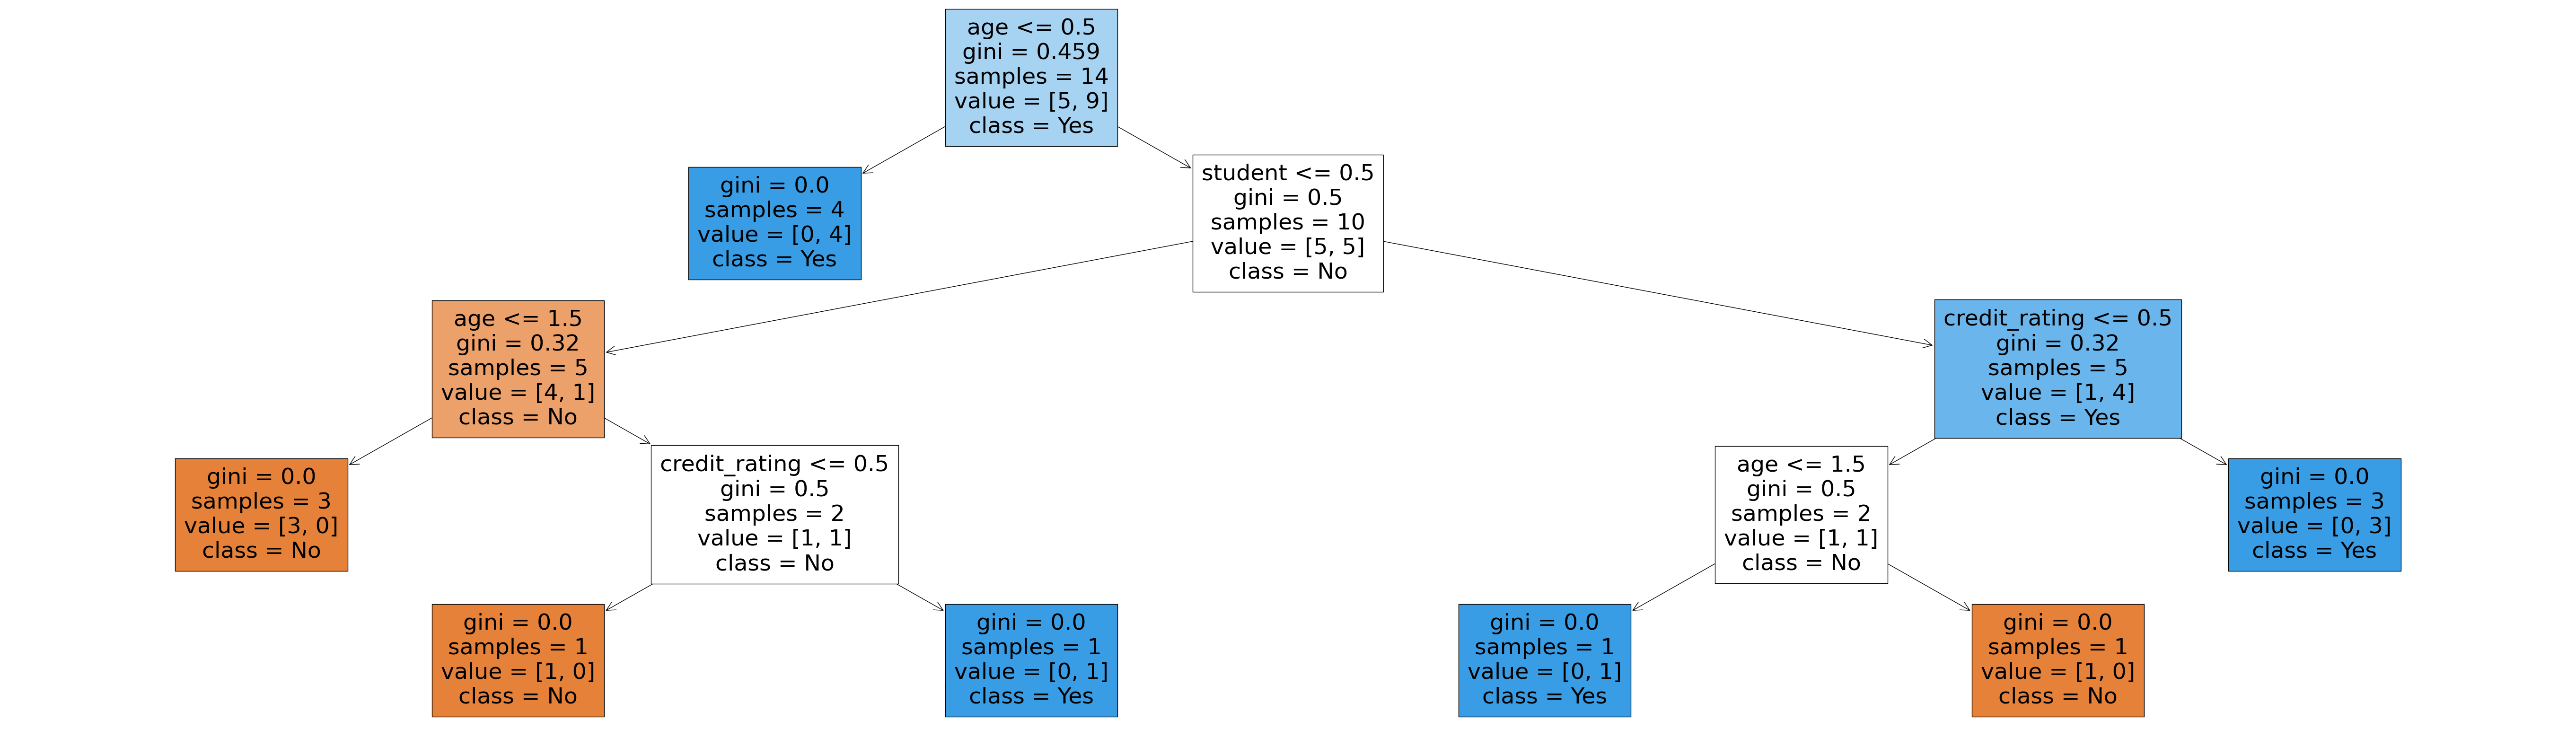

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a large figure to display the tree
plt.figure(figsize=(70, 20))

# Visualize the Decision Tree
plot_tree(model, filled=True, feature_names=df_encoded.columns[:-1], class_names=["No", "Yes"])

# Show the tree plot
plt.show()


In [7]:
from google.colab import files #importing files from google colb
uploaded = files.upload()


Saving t5_train (1).xlsx to t5_train (1) (1).xlsx


In [9]:
excel =pd.ExcelFile('t5_train (1) (1).xlsx')
df=pd.read_excel(excel, 'Sheet1')
df

,Unnamed: 0,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,0,-0.031154,0.005788,0.013190,0.032214,-0.002240,-0.007682,-0.042094,0.069687,0.041463,...,-0.052788,0.025505,-0.031762,-0.028066,-0.015836,0.020776,0.019726,-0.000173,-0.037625,-0.029255
1,1,-0.059829,-0.029655,0.023997,0.029381,-0.008910,0.002651,-0.021002,0.062534,0.041522,...,-0.024644,-0.002297,-0.039347,-0.055724,0.030523,0.044003,0.000522,-0.015451,-0.015479,-0.025860
2,2,-0.051916,0.002292,0.037476,0.018359,-0.009908,0.007921,-0.056453,0.073637,-0.002247,...,-0.015411,0.034888,-0.027017,-0.026406,-0.003014,0.036860,0.031879,-0.033040,-0.041552,0.003078
3,3,-0.065384,-0.042939,0.011656,0.032460,-0.013346,0.003960,-0.037575,0.053072,0.037404,...,-0.018055,-0.021441,-0.034868,-0.050517,0.026233,0.061242,0.004917,-0.020379,-0.039484,-0.018563
4,4,-0.060732,-0.030397,0.010289,0.024453,-0.004234,-0.000490,-0.037785,0.077979,-0.000518,...,-0.007468,0.018795,-0.028469,-0.058496,0.014169,0.047644,0.019805,-0.004765,-0.030699,0.001279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1122,-0.026631,-0.024138,0.022152,0.030705,-0.010941,0.010412,-0.068544,0.040590,0.020089,...,-0.041870,0.005108,-0.030552,-0.031571,0.000763,0.041070,0.018058,0.011748,-0.019817,-0.051990
1123,1123,-0.027868,-0.025621,0.021914,0.026630,-0.010832,0.006786,-0.064095,0.041112,0.022489,...,-0.044721,0.003304,-0.034322,-0.033685,0.000810,0.036538,0.018109,0.015402,-0.022393,-0.051995
1124,1124,-0.022655,-0.022344,0.028929,0.031298,-0.000826,0.014729,-0.062079,0.036594,0.022011,...,-0.038476,0.000219,-0.026677,-0.037036,-0.005554,0.044752,0.019307,0.008449,-0.014606,-0.051293
1125,1125,-0.019132,-0.029746,0.020091,0.027317,-0.008917,0.006835,-0.068679,0.038859,0.021410,...,-0.042361,-0.002104,-0.043841,-0.035514,-0.003528,0.030043,0.015535,0.023486,-0.018750,-0.058408


Training Accuracy: 1.0
Test Accuracy: 0.9174041297935103


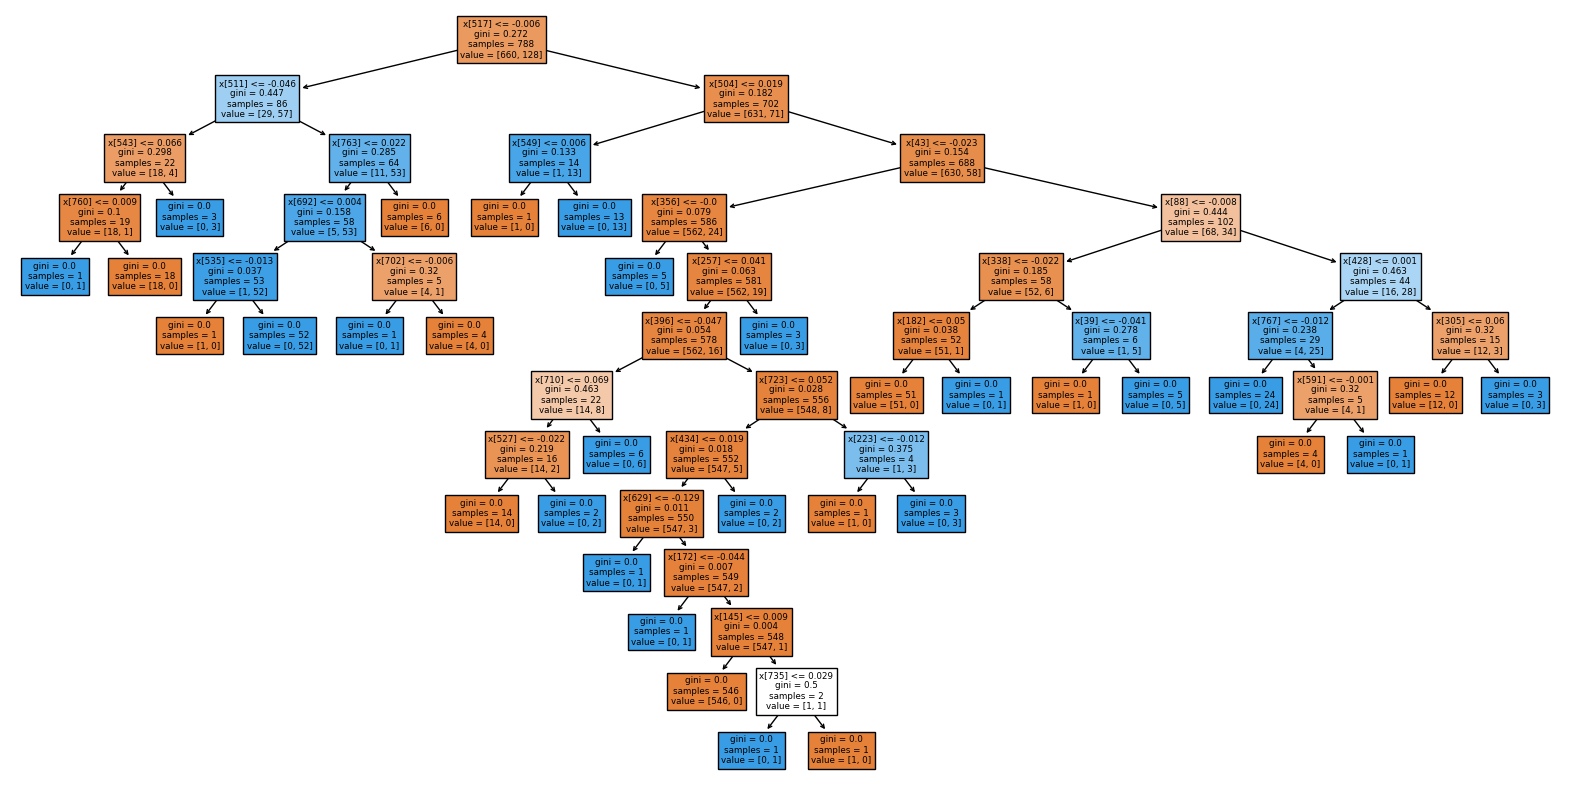

In [10]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
excel =pd.ExcelFile('t5_train (1) (1).xlsx')
df=pd.read_excel(excel, 'Sheet1')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Load and prepare your data (replace X and y with your data)
threshold=0
y_binary = np.where(y >= threshold, 1, 0)
X_train,X_test,y_train,y_test=train_test_split(X,y_binary,test_size=0.3)
#creating decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# Predict on the training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()

Accuracy with max_depth=5: 0.91


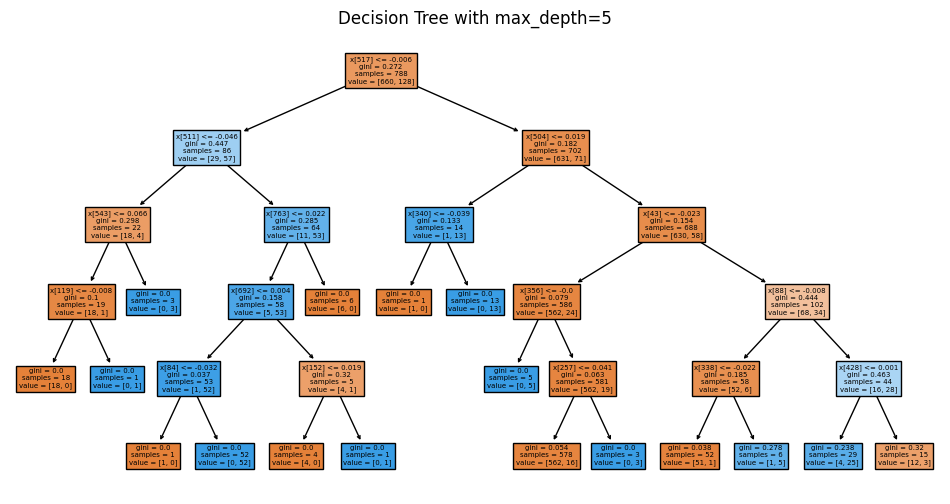

In [11]:
max_depth = 5
clf = DecisionTreeClassifier(max_depth=max_depth)
clf.fit(X_train, y_train)
# Predict on the test data
y_pred = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with max_depth={max_depth}: {accuracy:.2f}")
# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True)
plt.title(f'Decision Tree with max_depth={max_depth}')
plt.show()

Accuracy with default criterion='entropy': 0.86


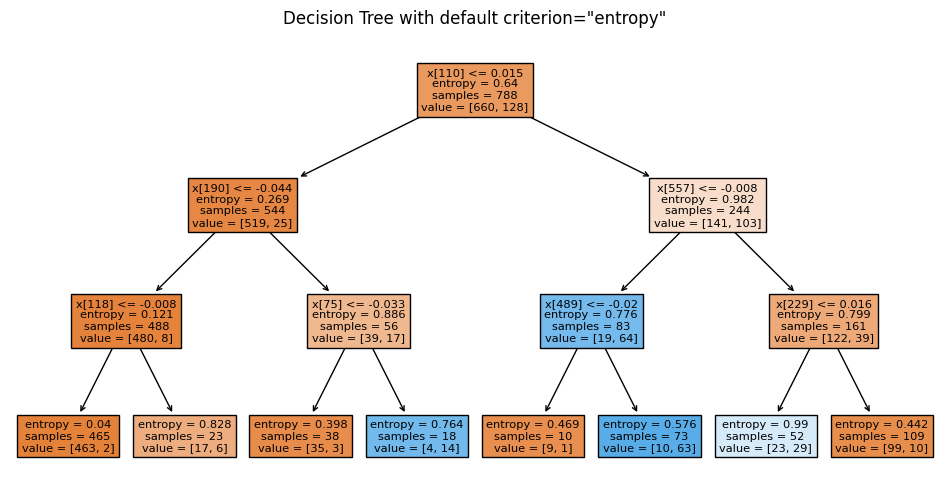

In [12]:
clf_entropy = DecisionTreeClassifier(max_depth= 3,criterion="entropy")
# Fit the classifier on the training data
clf_entropy.fit(X_train, y_train)
# Predict on the test data
y_pred_entropy = clf_entropy.predict(X_test)
# Calculate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy with default criterion='entropy': {accuracy_entropy:.2f}")
# Visualize the decision tree with "entropy" criterion
plt.figure(figsize=(12, 6))
plot_tree(clf_entropy, filled=True)
plt.title('Decision Tree with default criterion="entropy"')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#Evaluation Desicion tree
report_tree = classification_report(y_test, y_pred)
print("Classification Report of DecisionTree:")
print(report_tree)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred_rf = random_forest_classifier.predict(X_test)
# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report of Random Forest classifier:")
print(report_rf)

Classification Report of DecisionTree:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       281
           1       0.77      0.64      0.70        58

    accuracy                           0.91       339
   macro avg       0.85      0.80      0.82       339
weighted avg       0.90      0.91      0.90       339


Random Forest Classifier:
Accuracy: 0.94
Classification Report of Random Forest classifier:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       281
           1       0.93      0.72      0.82        58

    accuracy                           0.94       339
   macro avg       0.94      0.86      0.89       339
weighted avg       0.94      0.94      0.94       339



In [14]:
clf = RandomForestClassifier(
n_estimators=300, # Number of decision trees in the forest
max_depth=3, # Maximum depth of individual trees (None means unlimited)
min_samples_split=2, # Minimum number of samples required to split an internal node
min_samples_leaf=1, # Minimum number of samples required to be at a leaf node
max_features='auto', # The number of features to consider when looking for the best split ('auto' means
random_state=40 # Seed for random number generator for reproducibility
)
# Train the Random Forest classifier
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = clf.predict(X_test)
# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.887905604719764
